 # Лабораторная работа №2 Проведение исследований с логистической и линейной регрессией


## 2. Создание бейзлайна и оценка качества

In [72]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge



import seaborn as sns
import matplotlib.pyplot as plt

### Классификация

In [3]:
df = pd.read_csv(
    "train.csv"
)

df.head()


/tmp/ipykernel_26856/4101760861.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [4]:
drop_cols = [
    'ID',
    'Customer_ID',
    'Name',
    'SSN',
    'Month',
    'Credit_History_Age'
]

df = df.drop(columns=drop_cols)

num_as_obj = [
    'Age',
    'Annual_Income',
    'Num_of_Loan',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Outstanding_Debt',
    'Amount_invested_monthly',
    'Monthly_Balance'
]

for col in num_as_obj:
    df[col] = pd.to_numeric(df[col], errors='coerce')

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [7]:
sample_size = 20000
df_sample = df.sample(n=sample_size, random_state=42)

X = df_sample.drop('Credit_Score', axis=1)
y = df_sample['Credit_Score']


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)




In [8]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

logreg_pipeline = Pipeline(
    steps=[
        ('preprocess', preprocessor),
        ('model', LogisticRegression(
            max_iter=1000,
            multi_class='multinomial',
            n_jobs=-1
        ))
    ]
)

In [9]:
logreg_pipeline.fit(X_train, y_train)

/home/tatiana/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour'],
      dtype='object'))])),
                ('model',
                 LogisticRegression(max_iter=1000, multi_class='multinomial',
                                    n_jobs=-1))])

In [10]:
y_pred = logreg_pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6695
              precision    recall  f1-score   support

        Good       0.56      0.59      0.58       705
        Poor       0.71      0.57      0.63      1175
    Standard       0.69      0.75      0.72      2120

    accuracy                           0.67      4000
   macro avg       0.65      0.64      0.64      4000
weighted avg       0.67      0.67      0.67      4000



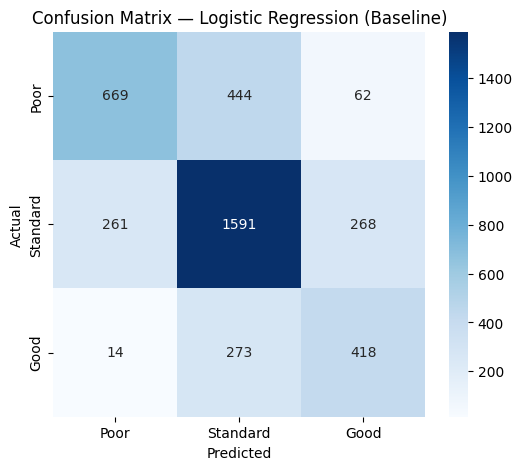

In [11]:
cm = confusion_matrix(y_test, y_pred, labels=['Poor', 'Standard', 'Good'])

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Poor', 'Standard', 'Good'],
    yticklabels=['Poor', 'Standard', 'Good']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix — Logistic Regression (Baseline)')
plt.show()


### Регрессия

In [60]:
df_reg = pd.read_csv(
    "vestiaire_20k.csv"
)

df_reg.head()

,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,warehouse_name,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,42438630,Wool hat,Wool hat Napapijri Black size 55 cm in Wool,"one size, like new",Napapijri Wool Hats & pull on hats,Men,Men Accessories,Autumn / Winter,Never worn,0.0,...,Tourcoing,25355068,Raffaele25355068,1-2 days,Italy,11.0,27.0,0.0,131.0,100.0
1,30324738,Leather flats,Leather flats Bruno Magli Black size 43.5 EU i...,"Excellent condition! UK size 9.5, EU 43.5",Bruno Magli Leather Flats,Men,Men Shoes,All seasons,Very good condition,6.0,...,Tourcoing,12877585,stelios12877585,NaN,Greece,5.0,2.0,649116.0,5.0,100.0
2,39089334,Polo shirt,Polo shirt LA MARTINA Multicolour size XXL Int...,"La Martina long sleeve polo shirt, size XXL in...",LA MARTINA Cotton Polo shirts,Men,Men Clothing,All seasons,Good condition,2.0,...,Tourcoing,21283960,anneanna21283960,1-2 days,Germany,132.0,90.0,0.0,25.0,95.0
3,39285681,Scarf,Scarf Twinset White in Cotton,Lightweight cotton scarf. White color with 2 h...,Twinset Cotton Scarves,Women,Women Accessories,Autumn / Winter,Very good condition,7.0,...,Tourcoing,15273943,bianca15273943,3-5 days,Italy,5.0,38.0,0.0,7.0,100.0
4,41107394,Leather low trainers,Leather low trainers Tod's Blue size 9.5 UK in...,"Iconic Tod's shoe, dark blue color. Mix suede ...",Tod's Leather Trainers,Men,Men Shoes,All seasons,Good condition,3.0,...,Tourcoing,19395265,Nicchia_20,6-7 days,Italy,4.0,15.0,0.0,163.0,100.0


In [61]:
drop_cols = [
    'product_id', 'product_name', 'product_description', 'brand_url',
    'seller_username', 'brand_name', 'product_keywords', 'seller_id', 'brand_id', 'seller_price' , 'seller_country'
]


df_reg = df_reg.drop(columns=drop_cols)

df_reg = df_reg.dropna(subset=[
    'product_category', 'has_cross_border_fees', 'usually_ships_within'
])

In [62]:
df_reg_sample = df_reg

X_sample = df_reg_sample.drop('price_usd', axis=1)
y_sample = df_reg_sample['price_usd']

num_cols = X_sample.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_sample.select_dtypes(include=['object', 'bool']).columns

X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample, test_size=0.2, random_state=42
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

In [65]:
linreg_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', LinearRegression())
])


In [66]:
linreg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['product_like_count', 'seller_earning', 'buyers_fees',
       'seller_products_sold', 'seller_num_products_listed',
       'seller_community_rank', 'seller_num_followers', 'seller_pass_rate'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['product_type', 'product_gender_target', 'product_category',
       'product_season', 'product_condition', 'sold', 'reserved', 'available',
       'in_stock', 'should_be_gone', 'product_material', 'product_color',
       'seller_badge', 'has_cross_border_fees', 'warehouse_name',
       'usually_ships_within'],
      dtype='object'))])),
                ('model', LinearRegression())])

In [67]:
y_pred = linreg_pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.4f}")


MAE: 21.69
RMSE: 57.10
R2: 0.9973


## 3. Улучшение бейзлайна

### Классификация

In [5]:
df = pd.read_csv(
    "train.csv"
)

df.head()

/tmp/ipykernel_3434/3975237315.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [6]:
drop_cols = [
    'ID',
    'Customer_ID',
    'Name',
    'SSN',
    'Month',
    'Credit_History_Age'
]

df = df.drop(columns=drop_cols)

num_as_obj = [
    'Age',
    'Annual_Income',
    'Num_of_Loan',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Outstanding_Debt',
    'Amount_invested_monthly',
    'Monthly_Balance'
]

for col in num_as_obj:
    df[col] = pd.to_numeric(df[col], errors='coerce')

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [7]:
print(df['Credit_Score'].value_counts())

sample_size_per_class = 20000 // df['Credit_Score'].nunique()

df_sample = (
    df.groupby('Credit_Score', group_keys=False)
      .apply(lambda x: x.sample(min(len(x), sample_size_per_class), random_state=42))
)

print(df_sample['Credit_Score'].value_counts())

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64
Credit_Score
Good        6666
Poor        6666
Standard    6666
Name: count, dtype: int64


/tmp/ipykernel_3434/422736674.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(min(len(x), sample_size_per_class), random_state=42))


In [9]:
X_sample = df_sample.drop('Credit_Score', axis=1)
y_sample = df_sample['Credit_Score']

X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample,
    test_size=0.2,
    random_state=42,
    stratify=y_sample
)

In [10]:
num_cols = X_sample.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_sample.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

logreg_pipeline = Pipeline(
    steps=[
        ('preprocess', preprocessor),
        ('model', LogisticRegression(
            max_iter=1000,
            multi_class='multinomial',
            n_jobs=-1
        ))
    ]
)

In [11]:
logreg_pipeline.fit(X_train, y_train)

/home/tatiana/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour'],
      dtype='object'))])),
                ('model',
                 LogisticRegression(max_iter=1000, multi_class='multinomial',
                                    n_jobs=-1))])

In [12]:
y_pred = logreg_pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.698
              precision    recall  f1-score   support

        Good       0.69      0.83      0.75      1333
        Poor       0.75      0.71      0.73      1333
    Standard       0.65      0.56      0.60      1334

    accuracy                           0.70      4000
   macro avg       0.70      0.70      0.69      4000
weighted avg       0.70      0.70      0.69      4000



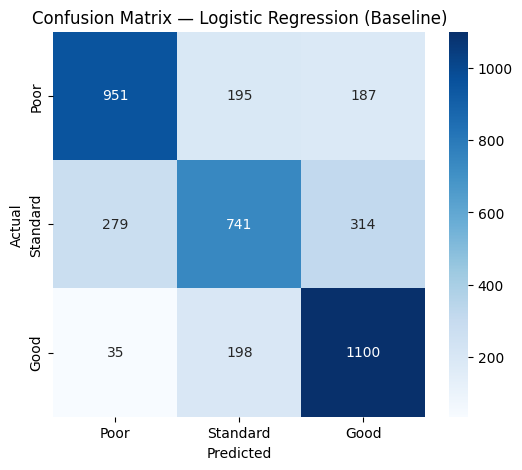

In [13]:
cm = confusion_matrix(y_test, y_pred, labels=['Poor', 'Standard', 'Good'])

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Poor', 'Standard', 'Good'],
    yticklabels=['Poor', 'Standard', 'Good']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix — Logistic Regression (Baseline)')
plt.show()


In [14]:
df = pd.read_csv(
    "train.csv"
)

df.head()

/tmp/ipykernel_3434/3975237315.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [15]:
import re

def convert_credit_history(age_str):
    if pd.isna(age_str):
        return None
    match = re.match(r'(\d+)\s*Years\s*and\s*(\d+)?\s*Months', age_str)
    if match:
        years = int(match.group(1))
        months = int(match.group(2)) if match.group(2) else 0
        return years + months / 12
    else:
        return None

df['Credit_History_Age_num'] = df['Credit_History_Age'].apply(convert_credit_history)

df[['Credit_History_Age', 'Credit_History_Age_num']].head()

num_as_obj = [
    'Age',
    'Annual_Income',
    'Num_of_Loan',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Outstanding_Debt',
    'Amount_invested_monthly',
    'Monthly_Balance'
]

for col in num_as_obj:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# df = df[(df['Credit_History_Age_num'].between(0, 100))]

# df = df[(df['Age'].between(0, 100))]

drop_cols = [
    'ID',
    'Customer_ID',
    'Name',
    'SSN',
    'Month',
    'Credit_History_Age'
]

df = df.drop(columns=drop_cols)

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [16]:
print(df['Credit_Score'].value_counts())

sample_size_per_class = 20000 // df['Credit_Score'].nunique()

df_sample = (
    df.groupby('Credit_Score', group_keys=False)
      .apply(lambda x: x.sample(min(len(x), sample_size_per_class), random_state=42))
)

print(df_sample['Credit_Score'].value_counts())

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64
Credit_Score
Good        6666
Poor        6666
Standard    6666
Name: count, dtype: int64


/tmp/ipykernel_3434/422736674.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(min(len(x), sample_size_per_class), random_state=42))


In [17]:
X_sample = df_sample.drop('Credit_Score', axis=1)
y_sample = df_sample['Credit_Score']

X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample,
    test_size=0.2,
    random_state=42,
    stratify=y_sample
)

In [18]:
num_cols = X_sample.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_sample.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

logreg_pipeline = Pipeline(
    steps=[
        ('preprocess', preprocessor),
        ('model', LogisticRegression(
            max_iter=1000,
            multi_class='multinomial',
            n_jobs=-1
        ))
    ]
)

In [19]:
logreg_pipeline.fit(X_train, y_train)

/home/tatiana/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',
       'Credit_History_Age_num'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour'],
      dtype='object'))])),
                ('model',
                 LogisticRegression(max_iter=1000, multi_class='multinomial',
                                    n_jobs=-1))])

In [20]:
y_pred = logreg_pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.69875
              precision    recall  f1-score   support

        Good       0.69      0.82      0.75      1333
        Poor       0.75      0.71      0.73      1333
    Standard       0.65      0.56      0.60      1334

    accuracy                           0.70      4000
   macro avg       0.70      0.70      0.70      4000
weighted avg       0.70      0.70      0.70      4000



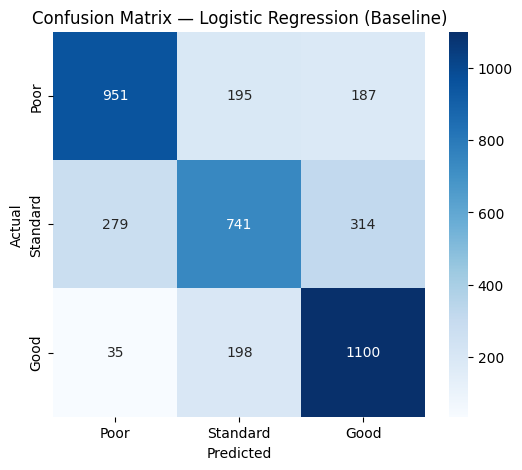

In [44]:
cm = confusion_matrix(y_test, y_pred, labels=['Poor', 'Standard', 'Good'])

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Poor', 'Standard', 'Good'],
    yticklabels=['Poor', 'Standard', 'Good']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix — Logistic Regression (Baseline)')
plt.show()


In [21]:
df = pd.read_csv(
    "train.csv"
)

df.head()

/tmp/ipykernel_3434/3975237315.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [22]:
import re

def convert_credit_history(age_str):
    if pd.isna(age_str):
        return None
    match = re.match(r'(\d+)\s*Years\s*and\s*(\d+)?\s*Months', age_str)
    if match:
        years = int(match.group(1))
        months = int(match.group(2)) if match.group(2) else 0
        return years + months / 12
    else:
        return None

df['Credit_History_Age_num'] = df['Credit_History_Age'].apply(convert_credit_history)

df[['Credit_History_Age', 'Credit_History_Age_num']].head()

num_as_obj = [
    'Age',
    'Annual_Income',
    'Num_of_Loan',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Outstanding_Debt',
    'Amount_invested_monthly',
    'Monthly_Balance'
]

for col in num_as_obj:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df[(df['Credit_History_Age_num'].between(0, 100))]

df = df[(df['Age'].between(0, 100))]


drop_cols = [
    'ID',
    'Customer_ID',
    'Name',
    'SSN',
    'Month',
    'Credit_History_Age'
]

df = df.drop(columns=drop_cols)

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [23]:
print(df['Credit_Score'].value_counts())

sample_size_per_class = 20000 // df['Credit_Score'].nunique()

df_sample = (
    df.groupby('Credit_Score', group_keys=False)
      .apply(lambda x: x.sample(min(len(x), sample_size_per_class), random_state=42))
)

print(df_sample['Credit_Score'].value_counts())

Credit_Score
Standard    44748
Poor        24401
Good        14882
Name: count, dtype: int64
Credit_Score
Good        6666
Poor        6666
Standard    6666
Name: count, dtype: int64


/tmp/ipykernel_3434/422736674.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(min(len(x), sample_size_per_class), random_state=42))


In [24]:
X_sample = df_sample.drop('Credit_Score', axis=1)
y_sample = df_sample['Credit_Score']

X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample,
    test_size=0.2,
    random_state=42,
    stratify=y_sample
)

In [26]:
num_cols = X_sample.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_sample.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

logreg_pipeline = Pipeline(
    steps=[
        ('preprocess', preprocessor),
        ('model', LogisticRegression(
            max_iter=1000,
            multi_class='multinomial',
            n_jobs=-1
        ))
    ]
)

In [27]:
logreg_pipeline.fit(X_train, y_train)

/home/tatiana/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',
       'Credit_History_Age_num'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour'],
      dtype='object'))])),
                ('model',
                 LogisticRegression(max_iter=1000, multi_class='multinomial',
                                    n_jobs=-1))])

In [28]:
y_pred = logreg_pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.70175
              precision    recall  f1-score   support

        Good       0.71      0.83      0.76      1333
        Poor       0.74      0.71      0.73      1333
    Standard       0.65      0.57      0.60      1334

    accuracy                           0.70      4000
   macro avg       0.70      0.70      0.70      4000
weighted avg       0.70      0.70      0.70      4000



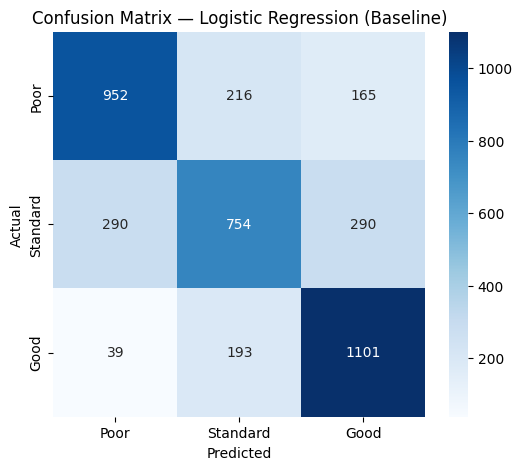

In [29]:
cm = confusion_matrix(y_test, y_pred, labels=['Poor', 'Standard', 'Good'])

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Poor', 'Standard', 'Good'],
    yticklabels=['Poor', 'Standard', 'Good']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix — Logistic Regression (Baseline)')
plt.show()


Fitting 3 folds for each of 5 candidates, totalling 15 fits


/home/tatiana/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/tatiana/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/tatiana/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/tatiana/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_cla

Best parameters: {'model__C': 10, 'model__penalty': 'l2'}
Accuracy: 0.704
              precision    recall  f1-score   support

        Good       0.71      0.83      0.77      1333
        Poor       0.76      0.71      0.73      1333
    Standard       0.64      0.58      0.60      1334

    accuracy                           0.70      4000
   macro avg       0.70      0.70      0.70      4000
weighted avg       0.70      0.70      0.70      4000



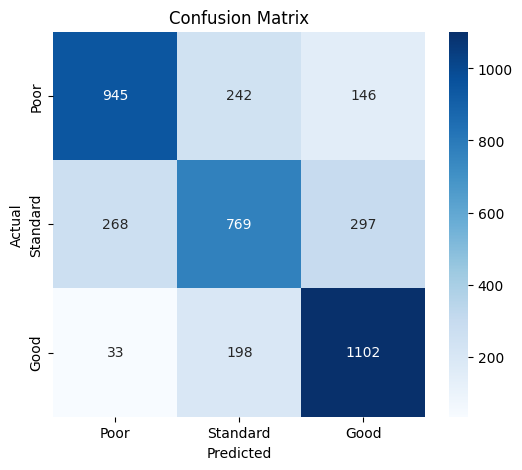

In [31]:
param_grid = {
    'model__C': [0.01, 0.1, 1, 10, 100],
    'model__penalty': ['l2'],   
}

grid_search = GridSearchCV(
    estimator=logreg_pipeline,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

best_logreg = grid_search.best_estimator_
y_pred_best = best_logreg.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

cm = confusion_matrix(y_test, y_pred_best, labels=['Poor', 'Standard', 'Good'])
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Poor', 'Standard', 'Good'], yticklabels=['Poor', 'Standard', 'Good'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Регрессия

In [68]:
df_reg = pd.read_csv(
    "vestiaire_20k.csv"
)

df_reg.head()

,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,warehouse_name,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,42438630,Wool hat,Wool hat Napapijri Black size 55 cm in Wool,"one size, like new",Napapijri Wool Hats & pull on hats,Men,Men Accessories,Autumn / Winter,Never worn,0.0,...,Tourcoing,25355068,Raffaele25355068,1-2 days,Italy,11.0,27.0,0.0,131.0,100.0
1,30324738,Leather flats,Leather flats Bruno Magli Black size 43.5 EU i...,"Excellent condition! UK size 9.5, EU 43.5",Bruno Magli Leather Flats,Men,Men Shoes,All seasons,Very good condition,6.0,...,Tourcoing,12877585,stelios12877585,NaN,Greece,5.0,2.0,649116.0,5.0,100.0
2,39089334,Polo shirt,Polo shirt LA MARTINA Multicolour size XXL Int...,"La Martina long sleeve polo shirt, size XXL in...",LA MARTINA Cotton Polo shirts,Men,Men Clothing,All seasons,Good condition,2.0,...,Tourcoing,21283960,anneanna21283960,1-2 days,Germany,132.0,90.0,0.0,25.0,95.0
3,39285681,Scarf,Scarf Twinset White in Cotton,Lightweight cotton scarf. White color with 2 h...,Twinset Cotton Scarves,Women,Women Accessories,Autumn / Winter,Very good condition,7.0,...,Tourcoing,15273943,bianca15273943,3-5 days,Italy,5.0,38.0,0.0,7.0,100.0
4,41107394,Leather low trainers,Leather low trainers Tod's Blue size 9.5 UK in...,"Iconic Tod's shoe, dark blue color. Mix suede ...",Tod's Leather Trainers,Men,Men Shoes,All seasons,Good condition,3.0,...,Tourcoing,19395265,Nicchia_20,6-7 days,Italy,4.0,15.0,0.0,163.0,100.0


In [69]:
drop_cols = [
    'product_id', 'product_name', 'product_description', 'brand_url',
    'seller_username', 'brand_name', 'product_keywords', 'seller_id', 'brand_id', 'seller_price' , 'seller_country'
]


df_reg = df_reg.drop(columns=drop_cols)

df_reg = df_reg.dropna(subset=[
    'product_category', 'has_cross_border_fees', 'usually_ships_within'
])

In [70]:
df_reg_sample = df_reg

X_sample = df_reg_sample.drop('price_usd', axis=1)
y_sample = df_reg_sample['price_usd']

num_cols = X_sample.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_sample.select_dtypes(include=['object', 'bool']).columns

X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample, test_size=0.2, random_state=42
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

In [73]:
ridge_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', Ridge())
])

param_grid_ridge = {
    'model__alpha': [0.01, 0.1, 1, 10, 100]
}

In [74]:
grid_ridge = GridSearchCV(
    estimator=ridge_pipeline,
    param_grid=param_grid_ridge,
    cv=3,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=1
)

grid_ridge.fit(X_train, y_train)

print("Best alpha:", grid_ridge.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best alpha: {'model__alpha': 10}


In [75]:
best_ridge = grid_ridge.best_estimator_

y_pred_ridge = best_ridge.predict(X_test)

print("Ridge MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("Ridge RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("Ridge R2:", r2_score(y_test, y_pred_ridge))


Ridge MAE: 19.419460838673437
Ridge RMSE: 48.03555943915371
Ridge R2: 0.9980629785094812


In [76]:
from sklearn.linear_model import Lasso

lasso_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', Lasso(max_iter=5000))
])

param_grid_lasso = {
    'model__alpha': [0.001, 0.01, 0.1, 1, 10]
}


In [77]:
grid_lasso = GridSearchCV(
    estimator=lasso_pipeline,
    param_grid=param_grid_lasso,
    cv=3,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=1
)

grid_lasso.fit(X_train, y_train)

print("Best alpha:", grid_lasso.best_params_)


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best alpha: {'model__alpha': 0.1}


In [78]:
best_lasso = grid_lasso.best_estimator_

y_pred_lasso = best_lasso.predict(X_test)

print("Lasso MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("Lasso RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("Lasso R2:", r2_score(y_test, y_pred_lasso))


Lasso MAE: 18.79072411075407
Lasso RMSE: 47.19046441499823
Lasso R2: 0.9981305354430369


In [79]:
drop_cols = ['product_type']

df_reg_sample_n = df_reg_sample.drop(columns=drop_cols)

In [80]:
X_sample = df_reg_sample_n.drop('price_usd', axis=1)
y_sample = df_reg_sample_n['price_usd']

num_cols = X_sample.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_sample.select_dtypes(include=['object', 'bool']).columns

X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample, test_size=0.2, random_state=42
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

In [81]:
ridge_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', Ridge())
])

param_grid_ridge = {
    'model__alpha': [0.01, 0.1, 1, 10, 100]
}

In [82]:
grid_ridge = GridSearchCV(
    estimator=ridge_pipeline,
    param_grid=param_grid_ridge,
    cv=3,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=1
)

grid_ridge.fit(X_train, y_train)

print("Best alpha:", grid_ridge.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best alpha: {'model__alpha': 10}


In [83]:
best_ridge = grid_ridge.best_estimator_

y_pred_ridge = best_ridge.predict(X_test)

print("Ridge MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("Ridge RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("Ridge R2:", r2_score(y_test, y_pred_ridge))


Ridge MAE: 19.40977741711223
Ridge RMSE: 47.62022710604748
Ridge R2: 0.9980963300364037


In [84]:
lasso_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', Lasso(max_iter=5000))
])

param_grid_lasso = {
    'model__alpha': [0.001, 0.01, 0.1, 1, 10]
}


In [85]:
grid_lasso = GridSearchCV(
    estimator=lasso_pipeline,
    param_grid=param_grid_lasso,
    cv=3,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=1
)

grid_lasso.fit(X_train, y_train)

print("Best alpha:", grid_lasso.best_params_)


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best alpha: {'model__alpha': 1}


In [86]:
best_lasso = grid_lasso.best_estimator_

y_pred_lasso = best_lasso.predict(X_test)

print("Lasso MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("Lasso RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("Lasso R2:", r2_score(y_test, y_pred_lasso))


Lasso MAE: 18.88312743513804
Lasso RMSE: 47.940858620075765
Lasso R2: 0.99807060855284


## 4. Имплементация алгоритма машинного обучения 

### Классификация.

In [32]:
import numpy as np

class LogisticRegressionCustom:
    def __init__(self, lr=0.1, n_iters=1000, verbose=False):
        self.lr = lr
        self.n_iters = n_iters
        self.verbose = verbose
        
    def _softmax(self, z):
        z = z - np.max(z, axis=1, keepdims=True) 
        exp_z = np.exp(z)
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)
    
    def _one_hot(self, y):
        one_hot = np.zeros((y.size, self.n_classes))
        one_hot[np.arange(y.size), y] = 1
        return one_hot
    
    def fit(self, X, y):
        self.classes_, y_encoded = np.unique(y, return_inverse=True)
        self.n_classes = len(self.classes_)
        
        n_samples, n_features = X.shape
        
        self.W = np.zeros((n_features, self.n_classes))
        self.b = np.zeros((1, self.n_classes))
        
        y_one_hot = self._one_hot(y_encoded)
        
        for i in range(self.n_iters):
            logits = np.dot(X, self.W) + self.b
            probs = self._softmax(logits)
            
            error = probs - y_one_hot
            
            dW = np.dot(X.T, error) / n_samples
            db = np.sum(error, axis=0, keepdims=True) / n_samples
            
            self.W -= self.lr * dW
            self.b -= self.lr * db
            
            if self.verbose and i % 100 == 0:
                loss = -np.mean(np.sum(y_one_hot * np.log(probs + 1e-15), axis=1))
                print(f"Iteration {i}, Loss: {loss:.4f}")
    
    def predict(self, X):
        logits = np.dot(X, self.W) + self.b
        probs = self._softmax(logits)
        class_indices = np.argmax(probs, axis=1)
        return self.classes_[class_indices]


In [49]:
df = pd.read_csv(
    "train.csv"
)

df.head()

/tmp/ipykernel_3434/3975237315.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [50]:
drop_cols = [
    'ID',
    'Customer_ID',
    'Name',
    'SSN',
    'Month',
    'Credit_History_Age'
]

df = df.drop(columns=drop_cols)

num_as_obj = [
    'Age',
    'Annual_Income',
    'Num_of_Loan',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Outstanding_Debt',
    'Amount_invested_monthly',
    'Monthly_Balance'
]

for col in num_as_obj:
    df[col] = pd.to_numeric(df[col], errors='coerce')

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [51]:
sample_size = 20000
df_sample = df.sample(n=sample_size, random_state=42)

X = df_sample.drop('Credit_Score', axis=1)
y = df_sample['Credit_Score']

X_num = X.select_dtypes(include=['int64', 'float64'])

X_train, X_test, y_train, y_test = train_test_split(
    X_num,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [52]:
logreg_custom = LogisticRegressionCustom(
    lr=0.1,
    n_iters=1000,
    verbose=True
)

logreg_custom.fit(X_train_scaled, y_train)


Iteration 0, Loss: 1.0986
Iteration 100, Loss: 0.8588
Iteration 200, Loss: 0.8497
Iteration 300, Loss: 0.8472
Iteration 400, Loss: 0.8462
Iteration 500, Loss: 0.8458
Iteration 600, Loss: 0.8456
Iteration 700, Loss: 0.8456
Iteration 800, Loss: 0.8455
Iteration 900, Loss: 0.8455


In [53]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_custom = logreg_custom.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_custom))
print(classification_report(y_test, y_pred_custom))


Accuracy: 0.58525
              precision    recall  f1-score   support

        Good       0.45      0.19      0.26       705
        Poor       0.65      0.42      0.51      1175
    Standard       0.58      0.81      0.68      2120

    accuracy                           0.59      4000
   macro avg       0.56      0.47      0.48      4000
weighted avg       0.58      0.59      0.56      4000



In [54]:
df = pd.read_csv(
    "train.csv"
)

df.head()

/tmp/ipykernel_3434/3975237315.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [55]:
import re

def convert_credit_history(age_str):
    if pd.isna(age_str):
        return None
    match = re.match(r'(\d+)\s*Years\s*and\s*(\d+)?\s*Months', age_str)
    if match:
        years = int(match.group(1))
        months = int(match.group(2)) if match.group(2) else 0
        return years + months / 12
    else:
        return None

df['Credit_History_Age_num'] = df['Credit_History_Age'].apply(convert_credit_history)

df[['Credit_History_Age', 'Credit_History_Age_num']].head()

num_as_obj = [
    'Age',
    'Annual_Income',
    'Num_of_Loan',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Outstanding_Debt',
    'Amount_invested_monthly',
    'Monthly_Balance'
]

for col in num_as_obj:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df[(df['Credit_History_Age_num'].between(0, 100))]

df = df[(df['Age'].between(0, 100))]


drop_cols = [
    'ID',
    'Customer_ID',
    'Name',
    'SSN',
    'Month',
    'Credit_History_Age'
]

df = df.drop(columns=drop_cols)

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [56]:
print(df['Credit_Score'].value_counts())

sample_size_per_class = 20000 // df['Credit_Score'].nunique()

df_sample = (
    df.groupby('Credit_Score', group_keys=False)
      .apply(lambda x: x.sample(min(len(x), sample_size_per_class), random_state=42))
)

print(df_sample['Credit_Score'].value_counts())

Credit_Score
Standard    44748
Poor        24401
Good        14882
Name: count, dtype: int64
Credit_Score
Good        6666
Poor        6666
Standard    6666
Name: count, dtype: int64


/tmp/ipykernel_3434/422736674.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(min(len(x), sample_size_per_class), random_state=42))


In [57]:
X_sample = df_sample.drop('Credit_Score', axis=1)
y_sample = df_sample['Credit_Score']

X_num = X_sample.select_dtypes(include=['int64', 'float64'])

X_train, X_test, y_train, y_test = train_test_split(
    X_num,
    y_sample,
    test_size=0.2,
    random_state=42,
    stratify=y_sample
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [58]:
logreg_custom = LogisticRegressionCustom(
    lr=0.1,
    n_iters=1000,
    verbose=True
)

logreg_custom.fit(X_train_scaled, y_train)


Iteration 0, Loss: 1.0986
Iteration 100, Loss: 0.8730
Iteration 200, Loss: 0.8681
Iteration 300, Loss: 0.8671
Iteration 400, Loss: 0.8668
Iteration 500, Loss: 0.8667
Iteration 600, Loss: 0.8667
Iteration 700, Loss: 0.8667
Iteration 800, Loss: 0.8667
Iteration 900, Loss: 0.8667


In [59]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_custom = logreg_custom.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_custom))
print(classification_report(y_test, y_pred_custom))


Accuracy: 0.621
              precision    recall  f1-score   support

        Good       0.62      0.78      0.69      1333
        Poor       0.70      0.65      0.68      1333
    Standard       0.53      0.42      0.47      1334

    accuracy                           0.62      4000
   macro avg       0.62      0.62      0.61      4000
weighted avg       0.62      0.62      0.61      4000



### Регрессия

In [87]:
class LinearRegressionCustom:
    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.loss_history = []

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)

        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0.0

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias

            error = y_pred - y

            dw = (2 / n_samples) * np.dot(X.T, error)
            db = (2 / n_samples) * np.sum(error)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            loss = np.mean(error ** 2)
            self.loss_history.append(loss)

    def predict(self, X):
        X = np.array(X)
        return np.dot(X, self.weights) + self.bias

    def score(self, X, y):
        y_pred = self.predict(X)

        return {
            'MAE': mean_absolute_error(y, y_pred),
            'RMSE': np.sqrt(mean_squared_error(y, y_pred)),
            'R2': r2_score(y, y_pred)
        }


In [88]:
df_reg = pd.read_csv(
    "vestiaire_20k.csv"
)

df_reg.head()

,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,warehouse_name,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,42438630,Wool hat,Wool hat Napapijri Black size 55 cm in Wool,"one size, like new",Napapijri Wool Hats & pull on hats,Men,Men Accessories,Autumn / Winter,Never worn,0.0,...,Tourcoing,25355068,Raffaele25355068,1-2 days,Italy,11.0,27.0,0.0,131.0,100.0
1,30324738,Leather flats,Leather flats Bruno Magli Black size 43.5 EU i...,"Excellent condition! UK size 9.5, EU 43.5",Bruno Magli Leather Flats,Men,Men Shoes,All seasons,Very good condition,6.0,...,Tourcoing,12877585,stelios12877585,NaN,Greece,5.0,2.0,649116.0,5.0,100.0
2,39089334,Polo shirt,Polo shirt LA MARTINA Multicolour size XXL Int...,"La Martina long sleeve polo shirt, size XXL in...",LA MARTINA Cotton Polo shirts,Men,Men Clothing,All seasons,Good condition,2.0,...,Tourcoing,21283960,anneanna21283960,1-2 days,Germany,132.0,90.0,0.0,25.0,95.0
3,39285681,Scarf,Scarf Twinset White in Cotton,Lightweight cotton scarf. White color with 2 h...,Twinset Cotton Scarves,Women,Women Accessories,Autumn / Winter,Very good condition,7.0,...,Tourcoing,15273943,bianca15273943,3-5 days,Italy,5.0,38.0,0.0,7.0,100.0
4,41107394,Leather low trainers,Leather low trainers Tod's Blue size 9.5 UK in...,"Iconic Tod's shoe, dark blue color. Mix suede ...",Tod's Leather Trainers,Men,Men Shoes,All seasons,Good condition,3.0,...,Tourcoing,19395265,Nicchia_20,6-7 days,Italy,4.0,15.0,0.0,163.0,100.0


In [89]:
drop_cols = [
    'product_id', 'product_name', 'product_description', 'brand_url',
    'seller_username', 'brand_name', 'product_keywords', 'seller_id', 'brand_id', 'seller_price' , 'seller_country'
]


df_reg = df_reg.drop(columns=drop_cols)

df_reg = df_reg.dropna(subset=[
    'product_category', 'has_cross_border_fees', 'usually_ships_within'
])

In [ ]:
df_reg_sample = df_reg

X_sample = df_reg_sample.drop('price_usd', axis=1)
y_sample = df_reg_sample['price_usd']

num_cols = X_sample.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_sample.select_dtypes(include=['object', 'bool']).columns

X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample, test_size=0.2, random_state=42
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)